### Data

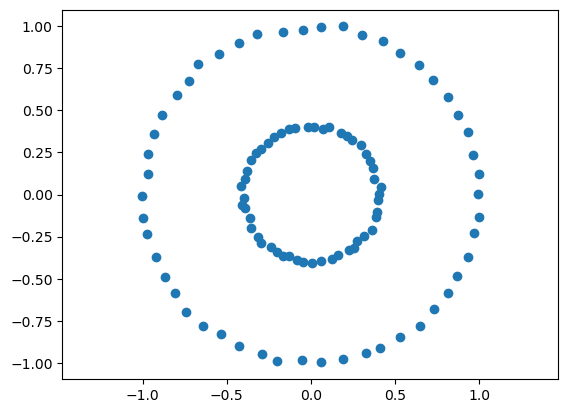

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate non-linearly separable data
X, y = make_circles(n_samples=100, noise=0.01, factor=0.4)

# Plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()


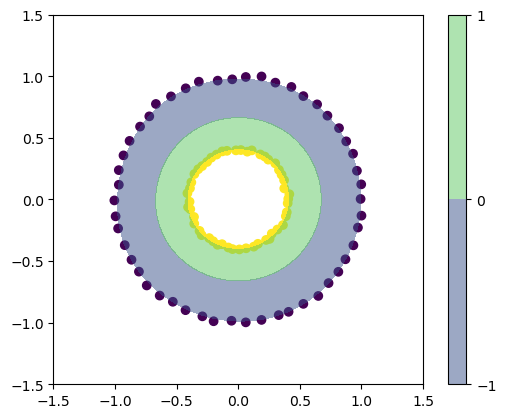

In [12]:
# Create SVM with Gaussian RBF kernel
svm = SVC(kernel='rbf')

# Fit the SVM to the data
svm.fit(X, y)

# Plot the decision boundary and the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# Create a meshgrid of the feature space
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary as a filled contour plot
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap='viridis')
plt.colorbar()

# Set the axis limits and aspect ratio
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

In [13]:
# Calculate accuracy on the training data
accuracy = svm.score(X, y)

print("Accuracy:", accuracy)

Accuracy: 1.0
